### Parametric Mode

Estimate the intrinsic distribution of planets by fitting a double broken power-law in period and radius to the Kepler data

In [1]:
import EPOS
import numpy as np
import matplotlib.pyplot as plt

initialize the EPOS class

In [2]:
epos= EPOS.epos(name='example_1')



 |~| epos 3.0.0.dev2 |~|


Using random seed 1099836816


Read in the kepler dr25 exoplanets and survey efficiency packaged with EPOS

In [3]:
obs, survey= EPOS.kepler.dr25(Huber=True, Vetting=True, score=0.9)


Loading planets from temp/q1_q17_dr25_koi.npz
  6853/7995 dwarfs
  3525 candidates, 3328 false positives
  3040+1 with score > 0.90


Load and display the observed planet candidates


Observations:
  159238 stars
  3041 planets

  1840 singles, 487 multis
  - single: 1840
  - double: 324
  - triple: 113
  - quad: 38
  - quint: 10
  - sext: 2


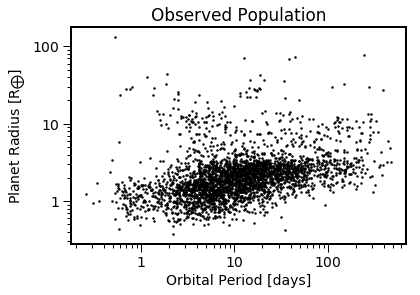

In [4]:
epos.set_observation(**obs)
EPOS.plot.survey.observed(epos, NB=True, PlotBox=False)

Load and display the survey detection efficiency

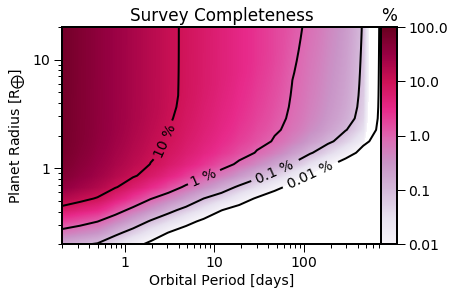

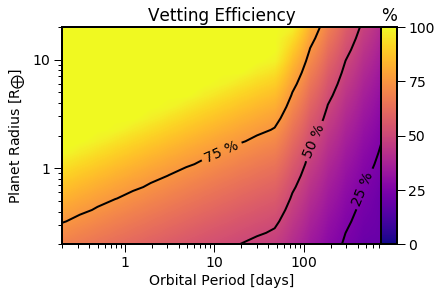

In [5]:
epos.set_survey(**survey)
EPOS.plot.survey.completeness(epos, NB=True, PlotBox=False)
EPOS.plot.survey.vetting(epos, PlotBox=False, NB=True)

Define the function that describes the intrinsic planet population. Here we use a double broken power-law from EPOS.fitfunctions.

In [6]:
epos.set_parametric(EPOS.fitfunctions.brokenpowerlaw2D)

brokenpowerlaw2D takes 8 parameters. 
The two dependent parameters are the period and radius. 
There are 6 free parameters (xp, p1, p2, yp, p3, p4) and a normalization parameter. 
Let's define them:

The normalization parameter, labeled pps, defines the integrated planet occurrence rate over the radius and period range (defined later on).
Let's use two planets per star as a starting guess, and exclude negative numbers with the min keyword.

In [7]:
epos.fitpars.add('pps',		2.0, 	min=0, 			isnorm=True)

Initialize the 6 free parameters that define the shape of the 2D period-radius distribution, and their allowed ranges (min,max).

In [8]:
epos.fitpars.add('P break',	10.,	min=2,	max=50,	is2D=True)
epos.fitpars.add('a_P',		1.5, 	min=0,			is2D=True)
epos.fitpars.add('b_P',		0.0,	dx=0.1,			is2D=True)
epos.fitpars.add('R break',	3.0,	min=1.0,max=5, 	is2D=True) 
epos.fitpars.add('a_R',		0.0,	dx=0.1, 		is2D=True)
epos.fitpars.add('b_R',		-4.,	fixed=True, 	is2D=True)

define the simulated range (trim) and the range compared to observations (zoom)

In [9]:
epos.set_ranges(xtrim=[0,730],ytrim=[0.3,20.],xzoom=[2,400],yzoom=[1,6], Occ=True)

Show the intial distribution

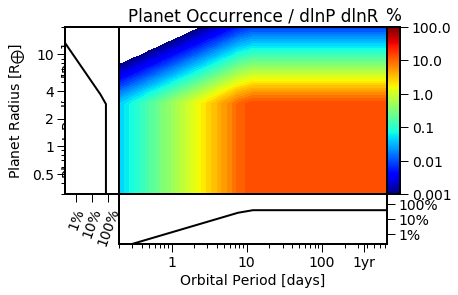

In [10]:
EPOS.plot.parametric.panels(epos, NB=True)

Generate an observable planet population with the inital guess and compare it to Kepler

In [11]:
EPOS.run.once(epos)


Preparing EPOS run...
  6 fit parameters

Starting the first MC run

Goodness-of-fit
  logp= -54.1
  - p(n=2398)=0.44
  - p(x)=3.1e-23
  - p(y)=0.24
  observation comparison in 0.003 sec
Finished one MC in 0.063 sec


Show the simulated detections

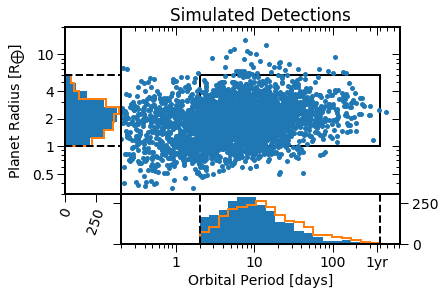

In [12]:
EPOS.plot.periodradius.panels(epos, NB=True)

Show the cumlative distributions used for the summary statistics

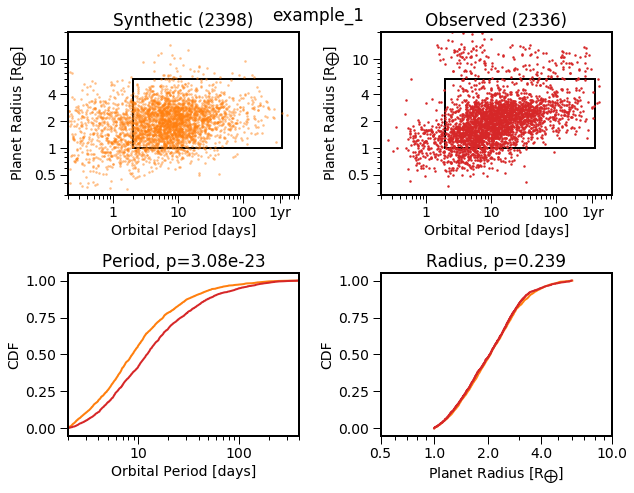

In [13]:
EPOS.plot.periodradius.cdf(epos, NB=True)

Looks like the simulated period distribution is a bit different from what is observed. Let's minimize the distance between the distributions using emcee. (Note the counter doesn't work yet)

In [14]:
EPOS.run.mcmc(epos, nMC=1000, nwalkers=100, nburn=200, threads=8, Saved=True)


Loading saved status from chain/example_1/100x1000x6.npz

NOTE: Random seed changed: 2553310461 to 1099836816

MC-ing the 30 samples to plot

Best-fit values
  pps= 3.92 +1.18 -0.959
  P break= 13 +4.11 -3.24
  a_P= 1.57 +0.444 -0.213
  b_P= 0.184 +0.129 -0.144
  R break= 2.93 +0.159 -0.184
  a_R= -0.29 +0.312 -0.194

Starting the best-fit MC run

Goodness-of-fit
  logp= -6.0
  - p(n=2361)=0.87
  - p(x)=0.47
  - p(y)=0.0057

  Akaike/Bayesian Information Criterion
  - k=6, n=2336
  - BIC= 58.6
  - AIC= 24.1, AICc= 0.9
  observation comparison in 0.004 sec


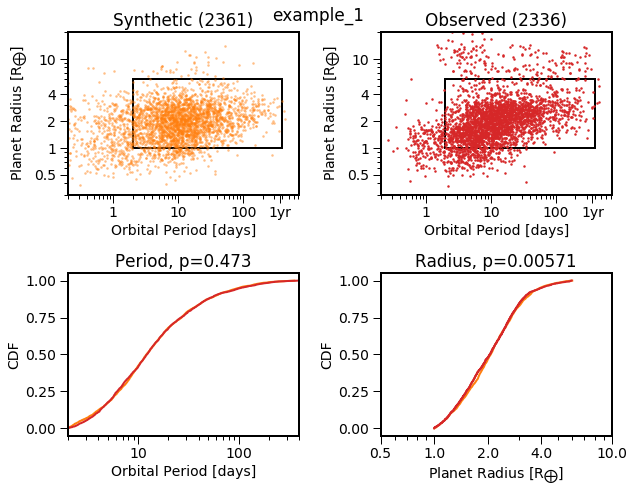

In [15]:
EPOS.plot.periodradius.cdf(epos, NB=True)

That looks better! 

In [16]:
#EPOS.plot.mcmc.corners(epos, NB=True)
#EPOS.plot.mcmc.chain(epos, NB=True)

Let's look at the posterior distributions

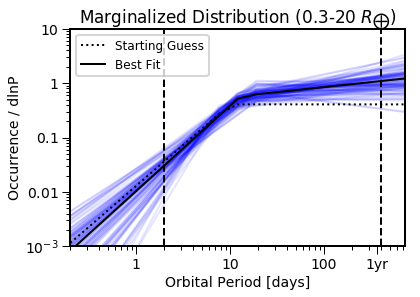

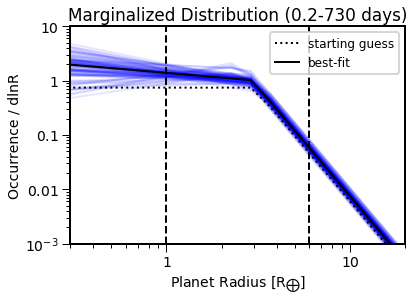

In [17]:
EPOS.plot.parametric.oneD_x(epos, MCMC=True, NB=True)
EPOS.plot.parametric.oneD_y(epos, MCMC=True, NB=True)

And compare them to the planet occurrence rates


Interpolating planet occurrence

  x zoom bins
  x: [2,400], y: [0.25,0.32], n=0, comp=nan, occ=0
  x: [2,400], y: [0.32,0.41], n=1, comp=0.0011, occ=0.0055
  x: [2,400], y: [0.41,0.53], n=8, comp=0.002, occ=0.82
  x: [2,400], y: [0.53,0.67], n=42, comp=0.0067, occ=0.11
  x: [2,400], y: [0.67,0.86], n=106, comp=0.016, occ=0.11
  x: [2,400], y: [0.86,1.1], n=184, comp=0.029, occ=0.12
  x: [2,400], y: [1.1,1.4], n=346, comp=0.039, occ=0.18
  x: [2,400], y: [1.4,1.8], n=475, comp=0.042, occ=0.22
  x: [2,400], y: [1.8,2.3], n=466, comp=0.035, occ=0.19
  x: [2,400], y: [2.3,2.9], n=520, comp=0.035, occ=0.21
  x: [2,400], y: [2.9,3.7], n=290, comp=0.031, occ=0.15
  x: [2,400], y: [3.7,4.7], n=104, comp=0.037, occ=0.051
  x: [2,400], y: [4.7,6], n=54, comp=0.038, occ=0.025
  x: [2,400], y: [6,7.6], n=46, comp=0.041, occ=0.026
  x: [2,400], y: [7.6,9.7], n=48, comp=0.034, occ=0.034
  x: [2,400], y: [9.7,12], n=51, comp=0.054, occ=0.027
  x: [2,400], y: [12,16], n=25, comp=0.061, occ=0.009
  x

/Users/mulders/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/mulders/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


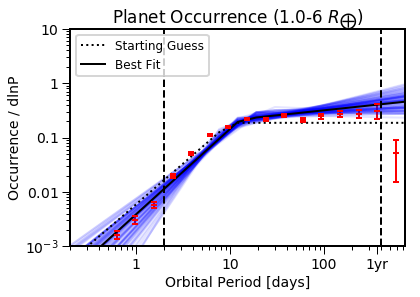

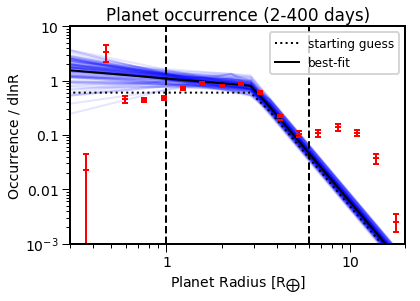

In [18]:
EPOS.occurrence.all(epos)
EPOS.plot.parametric.oneD_x(epos, MCMC=True, NB=True, Occ=True)
EPOS.plot.parametric.oneD_y(epos, MCMC=True, NB=True, Occ=True)

Now let's extrapolate into the Habitable Zone

In [19]:
epos.set_bins(xbins=[[0.9*365,2.2*365]], ybins=[[0.7,1.5]])
EPOS.occurrence.all(epos)


Interpolating planet occurrence

  Observed Planets
  x: [328,803], y: [0.7,1.5], n=0, comp=nan, occ=0

  x zoom bins
  x: [2,400], y: [0.25,0.32], n=0, comp=nan, occ=0
  x: [2,400], y: [0.32,0.41], n=1, comp=0.0011, occ=0.0055
  x: [2,400], y: [0.41,0.53], n=8, comp=0.002, occ=0.82
  x: [2,400], y: [0.53,0.67], n=42, comp=0.0067, occ=0.11
  x: [2,400], y: [0.67,0.86], n=106, comp=0.016, occ=0.11
  x: [2,400], y: [0.86,1.1], n=184, comp=0.029, occ=0.12
  x: [2,400], y: [1.1,1.4], n=346, comp=0.039, occ=0.18
  x: [2,400], y: [1.4,1.8], n=475, comp=0.042, occ=0.22
  x: [2,400], y: [1.8,2.3], n=466, comp=0.035, occ=0.19
  x: [2,400], y: [2.3,2.9], n=520, comp=0.035, occ=0.21
  x: [2,400], y: [2.9,3.7], n=290, comp=0.031, occ=0.15
  x: [2,400], y: [3.7,4.7], n=104, comp=0.037, occ=0.051
  x: [2,400], y: [4.7,6], n=54, comp=0.038, occ=0.025
  x: [2,400], y: [6,7.6], n=46, comp=0.041, occ=0.026
  x: [2,400], y: [7.6,9.7], n=48, comp=0.034, occ=0.034
  x: [2,400], y: [9.7,12], n=51, comp=0.0

/Users/mulders/EPOS/EPOS/analytics.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  cfactor= (2.* k_free**2. + 2.*k_free) / (n_data- k_free - 1.)


And visualize the distribution

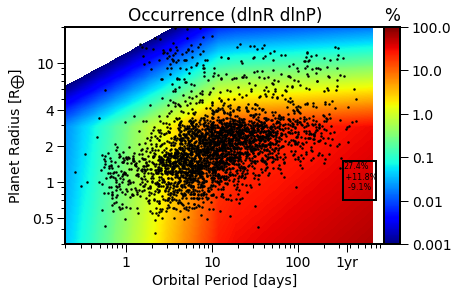

In [20]:
epos.plotpars['textsize']= 8 # Shrink text to fit in the box
epos.xtrim[1]= 1000 # Adjust plot axes
EPOS.plot.occurrence.integrated(epos, MCMC=True,Planets=True, NB=True)